In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

## Compare Activation Functions

In [2]:
# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalise pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# 2. Function to build MLP with different activation functions

def build_mlp(activation_fn):
    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# 3. Activations to compare

activations = ['sigmoid', 'tanh', 'relu', layers.LeakyReLU(alpha=0.01)]
history_results = {}
test_results = {}

for activation in activations:
    model = build_mlp(activation)
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

    history_results[str(activation)] = history.history
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_results[str(activation)] = test_acc
    print(f"Test accuracy for {activation}: {test_acc:.4f}")


Epoch 1/5


2025-08-25 16:25:00.224774: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


750/750 [==============================] - 1s 1ms/step - loss: 0.6803 - accuracy: 0.8417 - val_loss: 0.2861 - val_accuracy: 0.9223
Epoch 2/5
750/750 [==============================] - 1s 1ms/step - loss: 0.2513 - accuracy: 0.9277 - val_loss: 0.2057 - val_accuracy: 0.9428
Epoch 3/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1836 - accuracy: 0.9471 - val_loss: 0.1626 - val_accuracy: 0.9539
Epoch 4/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1431 - accuracy: 0.9584 - val_loss: 0.1457 - val_accuracy: 0.9574
Epoch 5/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1148 - accuracy: 0.9673 - val_loss: 0.1211 - val_accuracy: 0.9655
Test accuracy for sigmoid: 0.9633
Epoch 1/5
750/750 [==============================] - 1s 1ms/step - loss: 0.3275 - accuracy: 0.9064 - val_loss: 0.1931 - val_accuracy: 0.9453
Epoch 2/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1550 - accuracy: 0.9543 - val_loss: 0.1404 - val_accura

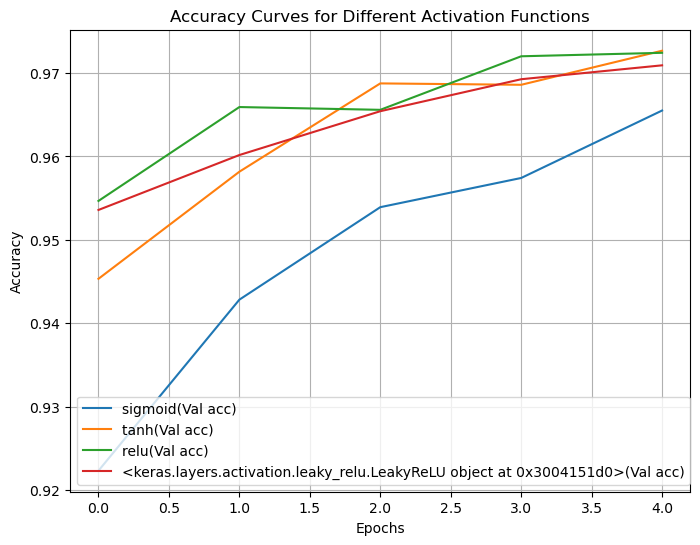

In [5]:
# 5. Plot accuracy curves for activation
plt.figure(figsize=(8, 6))
for activation, history in history_results.items():
  plt.plot(history['val_accuracy'], label=f'{activation}(Val acc)')

plt.title("Validation Accuracy for Different Activations")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves for Different Activation Functions')
plt.legend()
plt.grid(True)

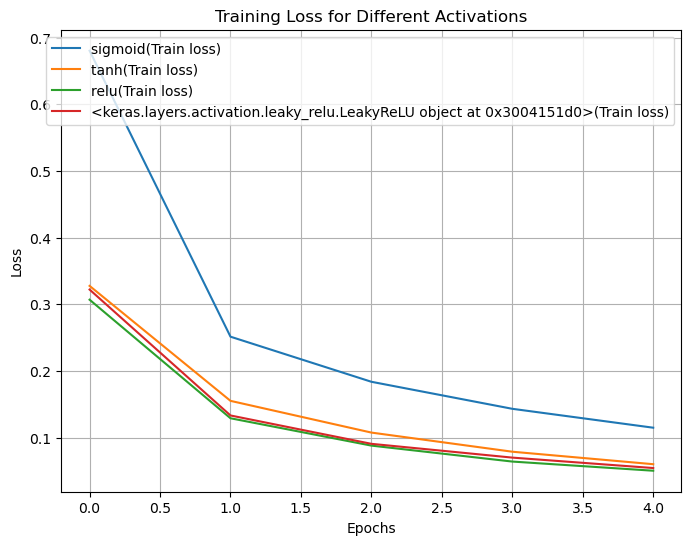

In [6]:
# 6. Plot training loss curves
plt.figure(figsize=(8, 6))
for activation, history in history_results.items():
  plt.plot(history['loss'], label=f'{activation}(Train loss)')

plt.title("Training Loss for Different Activations")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()